In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
 # above line is used to display graph itself in the notebook

In [69]:
import statistics

In [70]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [71]:
df = sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#mean
np.mean(df['total_bill'])

19.78594262295082

In [ ]:
#median
np.median(df['total_bill'])

17.795

In [ ]:
#mode
statistics.mode(df['total_bill'])

13.42

<Axes: >

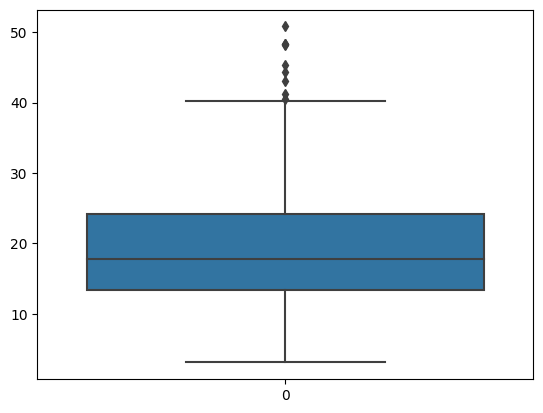

In [ ]:
sns.boxplot(df['total_bill'])

In [ ]:
#there are some outlier , dotted values are outliers
#kernel distance estimater smothens the histplot 

<Axes: xlabel='total_bill', ylabel='Count'>

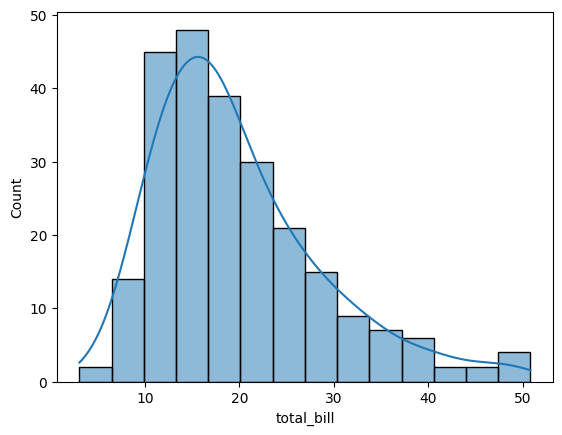

In [ ]:
sns.histplot(df['total_bill'], kde=True)
#this graph follow log normal distribution

"Convert the 'time' column to a categorical data type: If the 'time' column contains discrete categories, you can convert it to a categorical data type using the astype() function. \nFor example, you can use df['time'] = df['time'].astype('category') to convert the 'time' column to a categorical data type before plotting."

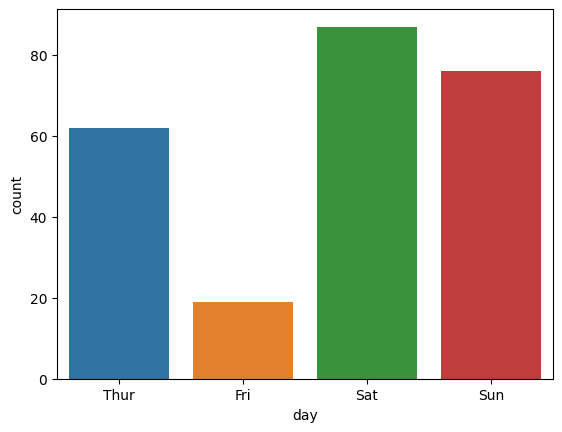

In [ ]:
sns.countplot(data=df, x= 'day')
"""Convert the 'time' column to a categorical data type: If the 'time' column contains discrete categories, you can convert it to a categorical data type using the astype() function. 
For example, you can use df['time'] = df['time'].astype('category') to convert the 'time' column to a categorical data type before plotting."""

In [ ]:
df['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
np.percentile(df['total_bill'],[0,1,10, 20, 30 ,50,90])

array([ 3.07 ,  7.25 , 10.34 , 12.636, 14.249, 17.795, 32.235])

In [ ]:
a,b= np.percentile(df['total_bill'],[25,75])

In [ ]:
IQR = b-a
print(IQR)

10.779999999999998


In [ ]:
# outlier
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19, 107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

<Axes: ylabel='Count'>

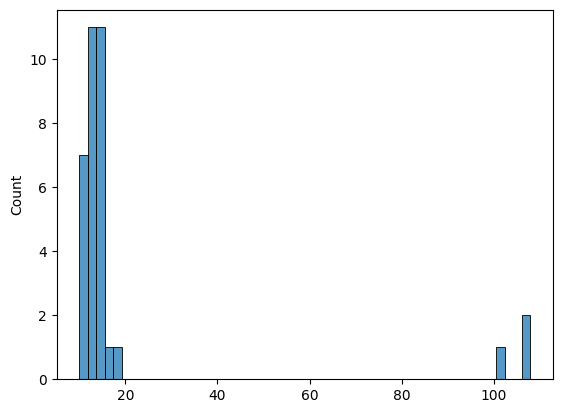

In [ ]:
sns.histplot(dataset)

In [ ]:
### Z Score , IQR
outliers=[]
def detect_outliers(dataset):
  threshold =3 #3 standard deviation
  mean = np.mean(dataset)
  std = np.std(dataset)

  for i in dataset:
    z_score= (i-mean)/std
    if np.abs(z_score)>threshold: #it makes -ve +ve
      outliers.append(i);
  return outliers

In [ ]:
detect_outliers(dataset)

[102, 107, 108]

## OUTLIER uSING IQR
1.sort the data

2.calculate q1 and q2

3.IQR(q1-q3)

4.Find the lower Fence(q1 - 1.5(iqr))

5.Find the upper fence (q3 + 1.5)iqr

In [ ]:
# outliers using IQR
outliers = []
def detect_outliers_Second(dataset):
  dataset = sorted(dataset)
  q1 , q3 = np.percentile(dataset,[25,75])
  iqr = q3-q1
  lower_fence= q1 - (1.5*iqr)
  higher_fence = q3 + (1.5*iqr)
  for i in dataset:
    if i <= lower_fence or i >= higher_fence:
      outliers.append(i);
  return outliers

detect_outliers_Second(dataset)


[102, 107, 108]

In [ ]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
#by default pearson is applied

In [ ]:
df.corr(method='spearman')

<ipython-input-7-657b2ea90450>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


In [ ]:
df.cov()

<ipython-input-8-6f98a29763d5>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


#Chi-Square Test#
The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [72]:
import scipy.stats as stats

In [73]:
dataset=sns.load_dataset('tips')

In [74]:
dataset_table = pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)
#like pivot table 

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [75]:
dataset_table2 = pd.crosstab(dataset['time'],dataset['day'])
print(dataset_table2, type(dataset_table2))
print(type(dataset_table2.values))

day     Thur  Fri  Sat  Sun
time                       
Lunch     61    7    0    0
Dinner     1   12   87   76 <class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [76]:
dataset_table.values 
#it convert data frame into numpy 

array([[60, 97],
       [33, 54]])

In [77]:
dataset_table.iloc[1:2,1:2]

smoker,No
sex,
Female,54


In [78]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [79]:
val= stats.chi2_contingency(dataset_table)

In [80]:
print(val)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))


In [81]:
#val=stats.chi2_contingency(dataset_table) returns a tuple of four values. The expected frequencies of each cell in the contingency table are the fourth element in the tuple, which is accessed using the indexing operator [3].
Expected_Values=val[3]

In [82]:
no_of_rows=len(dataset_table.iloc[:,0])
no_of_columns=len(dataset_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [83]:
x1 = [1,1,1,1,1]
y1 = [1,1,1,1,1]

In [84]:
result = sum([(x-y)*(x+y)/2 for x,y in zip(x1,y1)])
print(result)

0.0


In [85]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
print(chi_square)
chi_square_statistic = chi_square[0]+chi_square[1]

[0.00119737 0.00073745]


In [86]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [87]:
from scipy.stats import chi2
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [88]:
#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [89]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## T Test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

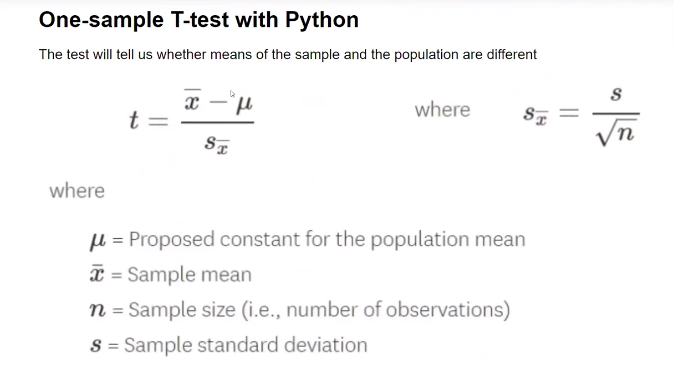

In [90]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
len(ages)

32

In [91]:
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [92]:
sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [93]:
#from this sample of ages, i will apply t test, and see that whether sample mean is approximately equal to population mean with some confidence interval
age_sample

array([16, 16, 14, 43, 18, 30, 18, 70, 35, 18])

In [94]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(age_sample,30)

In [95]:
print(ttest,p_value)

-0.3926346239251826 0.7037264337837337


In [98]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


## Some More Examples
Consider the age of students in a college and in Class A

In [114]:
import math
np.random.seed(6) #By setting the seed value explicitly, we can control the sequence of random numbers that are generated. If we run the same code with the same seed value, we will get the same sequence of random numbers every time. This makes our results reproducible, which is important for testing and debugging purposes.In other words, setting the random
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500) #population
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)   #sample

In [115]:
len(school_ages)

1500

In [116]:
classA_ages.mean()

46.9

In [117]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [118]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test


In [121]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()


50.65

In [123]:
_,p_value=stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)

The t-statistic measures the difference between the means of the two groups relative to the variance within each group. The p-value indicates the probability of observing the data given that there is no difference between the two groups. If the p-value is less than a chosen significance level (usually 0.05), then we reject the null hypothesis that the means of the two groups are equal and conclude that there is a statistically significant difference between the two groups.






In [124]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [125]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [126]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[26.46558062 28.32654957 27.13300552 26.72424845 18.96882844 29.28811469
 21.06890239 28.66158327 11.89020324 21.59490735 22.24779669 35.89004559
 26.50468994 25.63154255 43.57663772]


In [127]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [128]:
weight_df

,weight_10,weight_20,weight_change
0,25,26.465581,1.465581
1,30,28.326550,-1.673450
2,28,27.133006,-0.866994
3,35,26.724248,-8.275752
4,28,18.968828,-9.031172
5,34,29.288115,-4.711885
6,26,21.068902,-4.931098
7,29,28.661583,-0.338417
8,30,11.890203,-18.109797
9,26,21.594907,-4.405093


In [129]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [130]:
print(p_value)

0.007139357141471671


In [131]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Correlation

In [104]:
import seaborn as sns
df=sns.load_dataset('iris')

In [105]:
df.shape

(150, 5)

In [106]:
df.corr()

<ipython-input-106-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


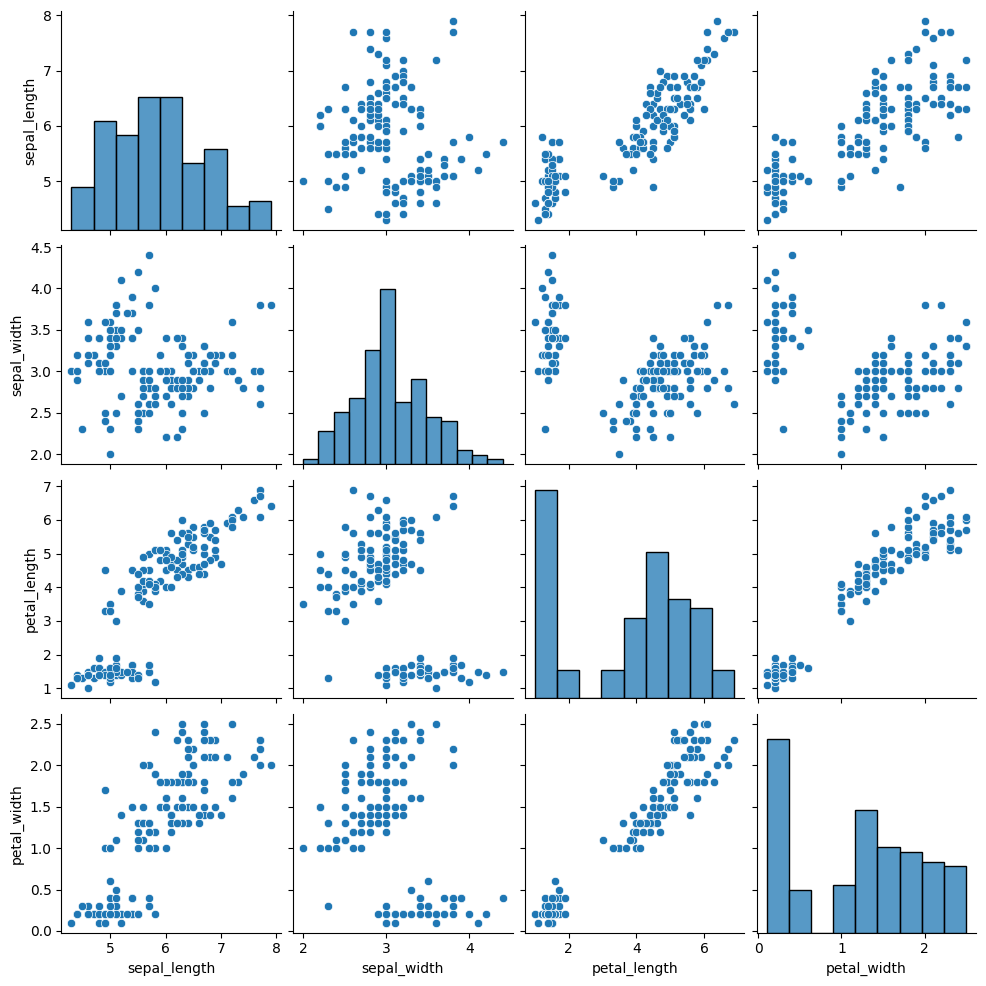

In [107]:
sns.pairplot(df)

## Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.


For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

### One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not 


In [ ]:
import seaborn as sns
df1=sns.load_dataset('iris')

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df_anova = df1[['petal_width','species']]

In [ ]:
grps = pd.unique(df_anova.species.values)

In [ ]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [108]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}
#This line of code is creating a dictionary called 'd_data' using a dictionary comprehension. 
#So, the resulting 'd_data' dictionary has keys corresponding to the unique groups in the 'species' column, and values corresponding to the 'petal_width' values for each group. This code might be used to create a dictionary of data to be used in an ANOVA (analysis of variance) test, where the 'petal_width' values are the dependent variable and the 'species' column is the independent variable.


In [109]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [110]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])
#e resulting 'F' and 'p' variables contain the F-statistic and p-value of the one-way ANOVA test performed on the 'petal_width' values for the 'setosa', 'versicolor', and 'virginica' species groups. This code might be used to test for significant differences in the 'petal_width' values among the three species groups, which could be useful for further analysis or interpretation.

In [111]:
print(p)

4.169445839443116e-85


In [ ]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
